Nama : Ari Supriatna <br>
NIM : 211351023 <br>
Kelas : Malam B

# Import Dataset

In [139]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"arisupriatna","key":"d9fa4b89643a3d3357f12cf6cbea1673"}'}

In [140]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [141]:
!kaggle datasets download -d fedesoriano/heart-failure-prediction

heart-failure-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [142]:
!mkdir heart-failure-prediction
!unzip heart-failure-prediction.zip -d heart-failure-prediction
!ls heart-failure-prediction

mkdir: cannot create directory ‘heart-failure-prediction’: File exists
Archive:  heart-failure-prediction.zip
replace heart-failure-prediction/heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: heart.csv


# Import Library Yang Digunakan

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import random
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data Discovery

In [144]:
df = pd.read_csv('heart-failure-prediction/heart.csv')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [146]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [147]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Axes: >

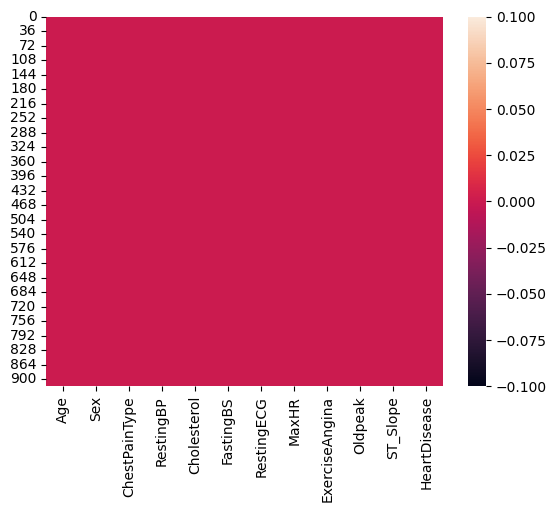

In [170]:
sns.heatmap(df.isnull())

<Axes: >

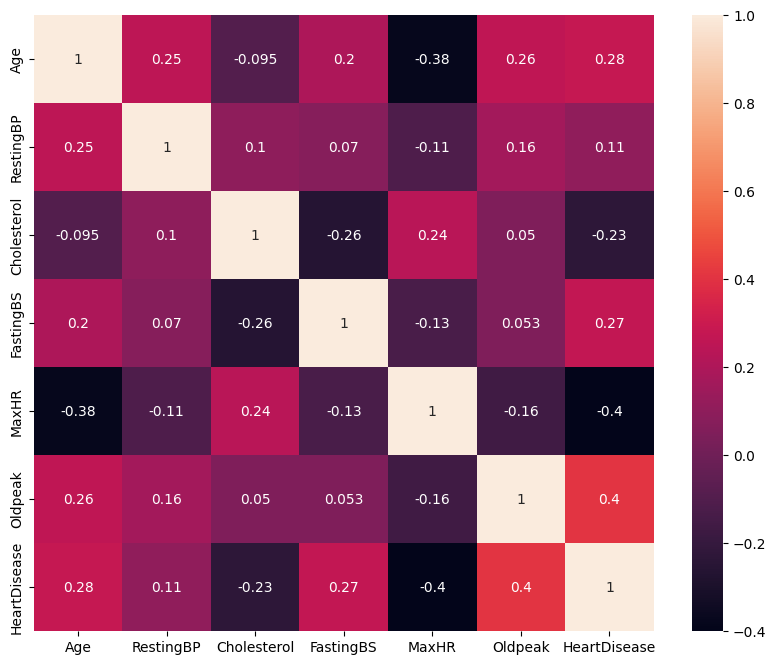

In [149]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

# EDA (minimal 5)

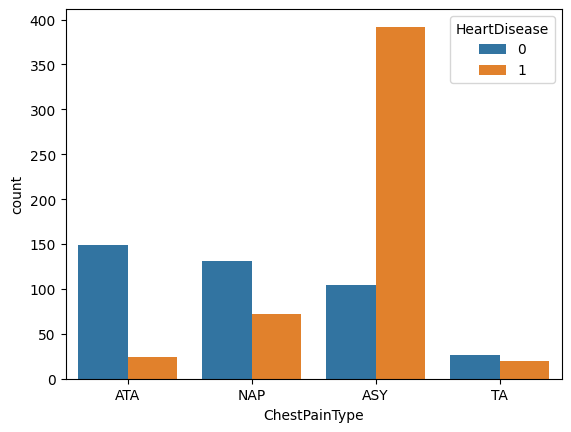

In [150]:
sns.countplot(x="ChestPainType", data=df,hue="HeartDisease")
plt.show()

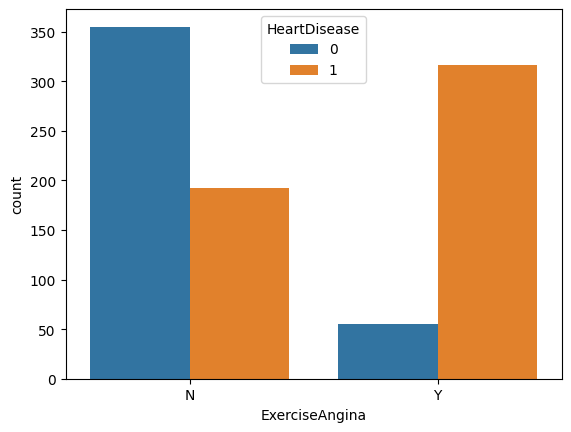

In [151]:
sns.countplot(x="ExerciseAngina", data=df,hue="HeartDisease")
plt.show()

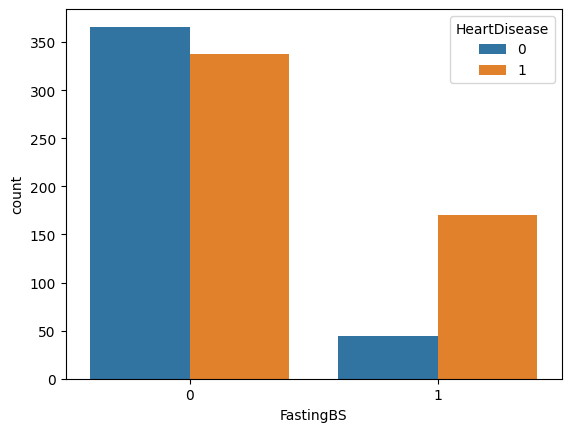

In [152]:
sns.countplot(x="FastingBS", data=df,hue="HeartDisease")
plt.show()

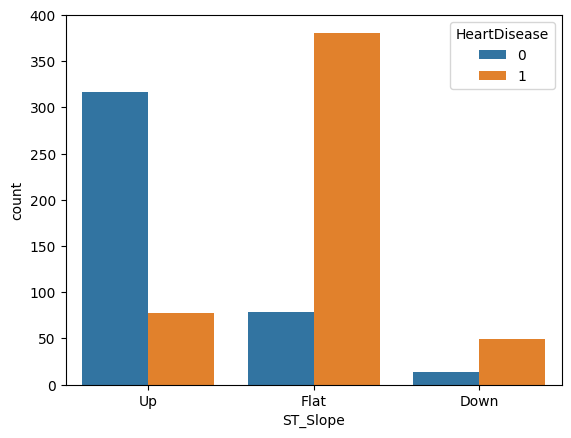

In [153]:
sns.countplot(x="ST_Slope", data=df,hue="HeartDisease")
plt.show()

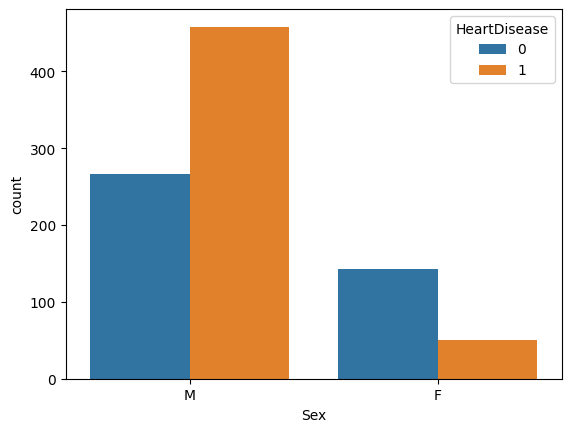

In [154]:
sns.countplot(x="Sex", data=df,hue="HeartDisease")
plt.show()

# Preprocessing

In [155]:
def LABEL_ENCODING(c1):

    label_encoder = preprocessing.LabelEncoder()
    df[c1]= label_encoder.fit_transform(df[c1])
    df[c1].unique()

In [156]:
LABEL_ENCODING("Sex")
LABEL_ENCODING("ChestPainType")
LABEL_ENCODING("RestingECG")
LABEL_ENCODING("ExerciseAngina")
LABEL_ENCODING("ST_Slope")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


# modeling

In [157]:
scaler = StandardScaler()
scaler.fit(df.drop('HeartDisease',axis = 1))

StandardScaler()

In [158]:
scaled_features = scaler.transform(df.drop('HeartDisease',axis = 1))
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114


In [159]:
X = df_feat
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [160]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [161]:
pred = knn.predict(X_test)
pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [162]:
print(confusion_matrix(y_test,pred))

[[105  21]
 [ 21 129]]


In [163]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       126
           1       0.86      0.86      0.86       150

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



In [164]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

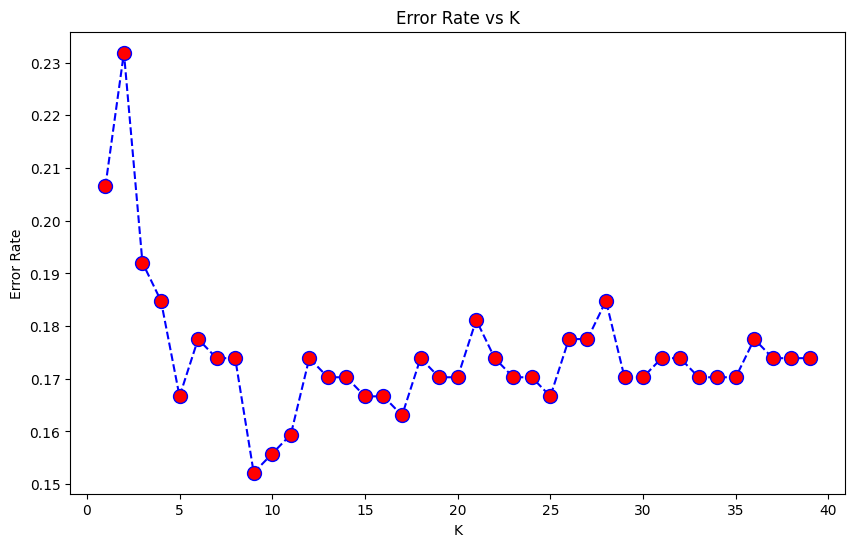

In [165]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [166]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.8478260869565217


# Visualisasi hasil algoritma

In [167]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['Sex'].value_counts().values.tolist(),
                      x = df['Sex'].value_counts().index,
                      text=df['Sex'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['Sex'].value_counts().keys(),
                             values=df['Sex'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,800])
#Changing plot & figure background
fig.update_layout(
                    paper_bgcolor= '#FFFDE7',
                    plot_bgcolor= '#FFFDE7',
                    title=dict(text = "Gender Distribution",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

In [168]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['HeartDisease'].value_counts().values.tolist(),
                      x = df['HeartDisease'].value_counts().index,
                      text=df['HeartDisease'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['HeartDisease'].value_counts().keys(),
                             values=df['HeartDisease'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,550])
#Changing plot & figure background
fig.update_layout(
                    paper_bgcolor= '#FFFDE7',
                    plot_bgcolor= '#FFFDE7',
                    title=dict(text = "HeartDisease Distribution",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

# save model (pickle)

In [169]:
import pickle
filename = 'heart-failure-prediction.sav'
pickle.dump(knn, open(filename, 'wb'))